In [1]:
from numpy import *
Nobs = 20
x_true = random.uniform(0,10, size=Nobs)
y_true = random.uniform(-1,1, size=Nobs)
alpha_true = 0.5
beta_x_true = 1.0
beta_y_true = 10.0
eps_true = 0.5
z_true = alpha_true + beta_x_true*x_true + beta_y_true*y_true
z_obs = z_true + random.normal(0, eps_true, size=Nobs)

In [2]:
x_true

array([ 9.12935081,  7.07718424,  6.28292957,  4.20897002,  5.96721406,
        1.07015843,  5.0443859 ,  9.37849405,  8.96988467,  5.53849941,
        6.00181905,  9.64876366,  1.59772439,  7.83786653,  5.77612225,
        8.02386002,  4.28857188,  7.83814644,  8.30144427,  4.33768769])

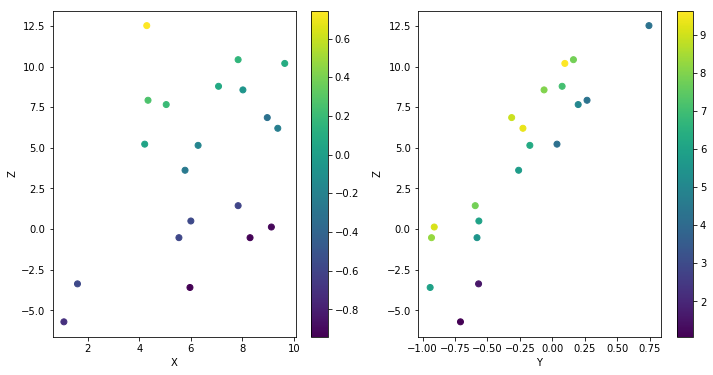

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(x_true, z_obs, c=y_true, marker='o')
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Z')
plt.subplot(1,2,2)
plt.scatter(y_true, z_obs, c=x_true, marker='o')
plt.colorbar()
plt.xlabel('Y')
plt.ylabel('Z')

In [4]:
model = """
data {
   int<lower=4> N; // Number of data points
   real x[N];      // the 1st predictor
   real y[N];      // the 2nd predictor
   real z[N];      // the outcome
}
parameters {
   real alpha;     // intercept
   real betax;     // x-slope
   real betay;     // y-slope
   real<lower=0> eps;       // dispersion
}
model {
   for (i in 1:N)
      z[i] ~ normal(alpha + betax * x[i] + betay * y[i], eps);
}"""

In [5]:
data = {'N':Nobs, 'x':x_true, 'y':y_true, 'z':z_obs}

In [6]:
import pystan
fit = pystan.stan(model_code=model, data=data, iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_a87850813aab96ee1be5112f40cf12e0 NOW.


CompileError: command 'gcc' failed with exit status 4

In [ ]:
print fit